In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [13]:
df.min(),df.max()

(Undergrad                NO
 Marital.Status     Divorced
 Taxable.Income        10003
 City.Population       25779
 Work.Experience           0
 Urban                    NO
 dtype: object,
 Undergrad             YES
 Marital.Status     Single
 Taxable.Income      99619
 City.Population    199778
 Work.Experience        30
 Urban                 YES
 dtype: object)

In [23]:
df["Taxable.Income"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [24]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,Good,50047,10,1,0
1,1,0,Good,134075,18,1,0
2,0,1,Good,160205,30,1,0
3,1,2,Good,193264,15,1,0
4,0,1,Good,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,Good,39492,7,1,0
596,1,0,Good,55369,2,1,0
597,0,0,Good,154058,0,1,0
598,1,1,Good,180083,17,0,0


In [27]:
df.dtypes

Undergrad          int64
Marital.Status     int64
Taxable.Income     int32
City.Population    int64
Work.Experience    int64
Urban              int64
TaxInc             int32
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
df['Undergrad']=le_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=le_encoder.fit_transform(df['Marital.Status'])
df['Urban']=le_encoder.fit_transform(df['Urban'])
df['Taxable.Income']=le_encoder.fit_transform(df['Taxable.Income'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,0,50047,10,1,0
1,1,0,0,134075,18,1,0
2,0,1,0,160205,30,1,0
3,1,2,0,193264,15,1,0
4,0,1,0,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,0,39492,7,1,0
596,1,0,0,55369,2,1,0
597,0,0,0,154058,0,1,0
598,1,1,0,180083,17,0,0


In [29]:
df.dtypes

Undergrad          int64
Marital.Status     int64
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int64
TaxInc             int32
dtype: object

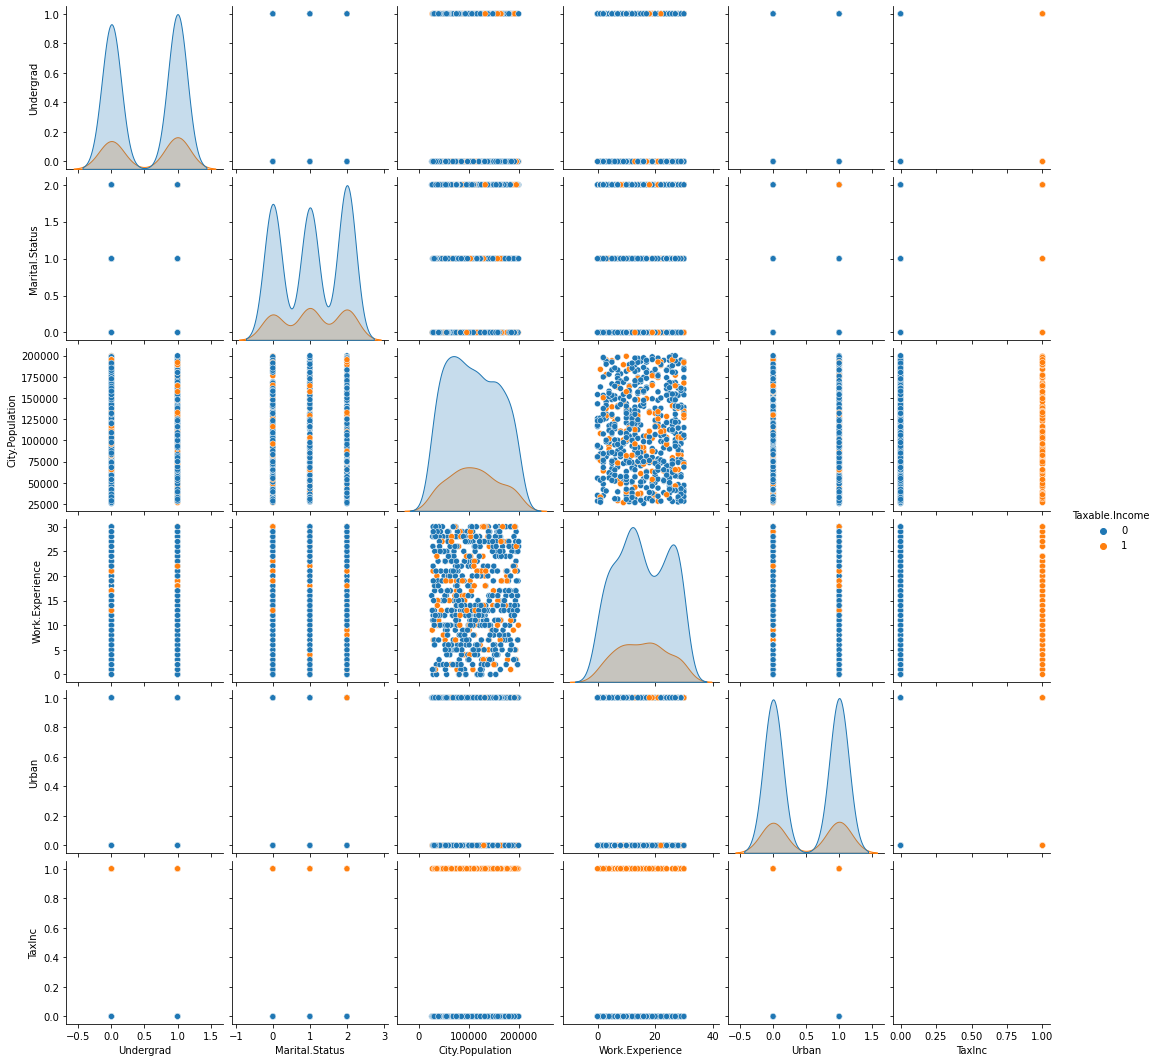

In [30]:
sns.pairplot(data=df,hue='Taxable.Income')

In [31]:
X=df.drop(['Taxable.Income'],axis=1)
y=df[['Taxable.Income']]

In [32]:
X.shape,y.shape

((600, 6), (600, 1))

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=12)

In [34]:
X_train.shape,y_train.shape

((510, 6), (510, 1))

In [35]:
X_test.shape,y_test.shape

((90, 6), (90, 1))

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

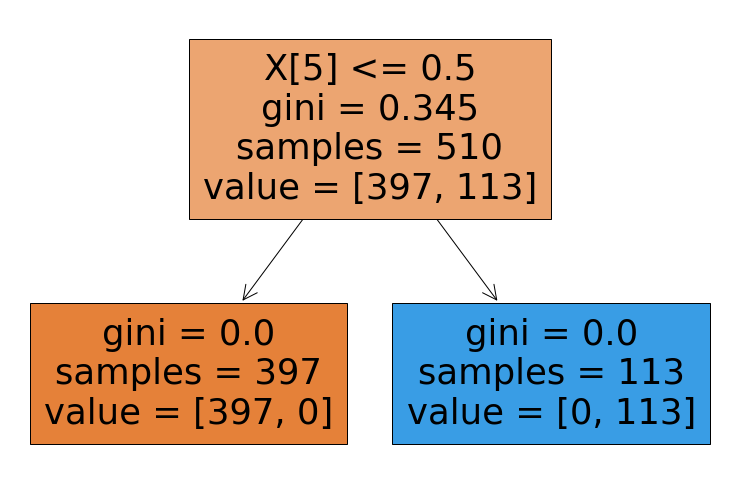

In [37]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(13,9))
plot_tree(decision_tree=dt_model,filled=True)
plt.show()

In [38]:
y_train_pred=dt_model.predict(X_train)
accuracy_score(y_train,y_train_pred)y_train_pred=dt_model.predict(X_train)
accuracy_score(y_train,y_train_pred)

1.0

In [39]:
confusion_matrix(y_train,y_train_pred)

array([[397,   0],
       [  0, 113]], dtype=int64)

In [40]:
y_test_pred=dt_model.predict(X_test)

In [41]:
accuracy_score(y_test,y_test_pred)

1.0

In [42]:
confusion_matrix(y_test,y_test_pred)

array([[79,  0],
       [ 0, 11]], dtype=int64)

In [48]:
print('Classification Report : \n',classification_report(y_train,y_train_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       113

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [49]:
from sklearn.model_selection import GridSearchCV
grid_search_cv=GridSearchCV(estimator=dt_model,param_grid={'criterion':['entropy','gini'],
                                           'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                                            cv=5
                                           )
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
1.0


### Model Building Using Entropy

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=1)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [51]:
y_train_pred=dt_model.predict(X_train)
accuracy_score(y_train,y_train_pred)

1.0

In [52]:
confusion_matrix(y_train,y_train_pred)

array([[397,   0],
       [  0, 113]], dtype=int64)

In [53]:
y_test_pred=dt_model.predict(X_test)

In [54]:
accuracy_score(y_test,y_test_pred)

1.0

In [55]:
confusion_matrix(y_test,y_test_pred)

array([[79,  0],
       [ 0, 11]], dtype=int64)

In [56]:
print('Classification Report : \n',classification_report(y_train,y_train_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       113

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

